In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pyAgrum as gum
import pyAgrum.lib.ipython as gnb

%matplotlib inline

## <font color='red'> La planche de Galton <font>

### 1.Loi de Bernouilli

In [2]:
def bernouilli(p):
    if random.random() <= p:
        return 1
    else:
        return 0

In [3]:
bernouilli(0.5)

0

### 2.Loi binomiale

In [4]:
def binomiale(n,p):
    res = 0
    for i in range(n):
        res += bernouilli(p)
    return res

In [5]:
binomiale(5,0.5)

1

### 3.Histogramme de la loi binomiale

In [6]:
def galton(n,p):
    tableau_1000_cases = []
    for i in range(1000):
        tableau_1000_cases.append(binomiale(n,p))
    tableau_1000_cases = np.array(tableau_1000_cases)   
    plt.hist(tableau_1000_cases, np.unique(tableau_1000_cases).size)

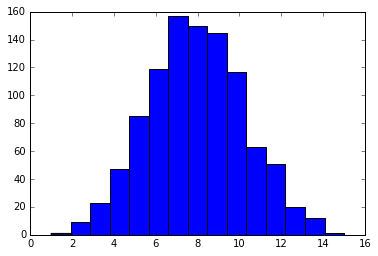

In [7]:
galton(40,0.2)

## <font color='red'> Visualisation d'indépendances <font>

### 1. Loi normale centrée 

In [8]:
def normale (k, sigma):
    mu = 0
    if k % 2 == 0:
        raise ValueError ('k doit etre impair')
    X = []
    Y = []
    x = -2*sigma
    while len(X) < k + 1:
        X.append(x)
        Y.append(1/(sigma * np.sqrt(2 * np.pi)) * np.exp((- 1/2)*(((x - mu)/sigma))**2))
        x += 4*sigma/k
    return np.array(X),np.array(Y)

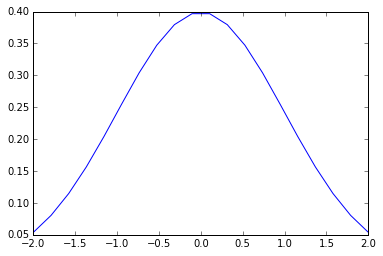

In [9]:
X,Y = normale(19,1)
plt.plot(X,Y)
plt.show()

### 2. Distribution de probabilité affine 

In [10]:
def proba_affine(k, slope):
    if k % 2 == 0:
        raise ValueError ('k doit etre impair')
    if abs(slope) > 2. / (k * k):
        raise ValueError ('la pente est trop raide : pente max = ' + str ( 2. / ( k * k ) ) )
    X = []
    Y = []
    for i in range(k + 1):
        X.append(i)
        Y.append((1/k) + (i - (k - 1)/2)*slope)
    return np.array(X), np.array(Y)

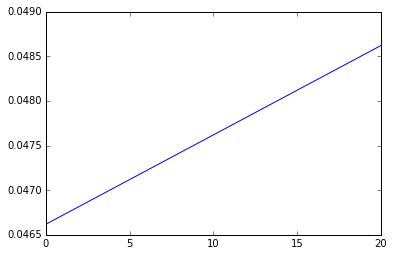

In [11]:
X,Y = proba_affine(21, 0.0001)
plt.plot(X,Y)
plt.xlim(0, 20)
plt.show()

### 3. Distribution jointe 

In [12]:
def P_XY(P_X, P_Y):
    P_XY = []
    for x in P_X:
        l = []
        for y in P_Y:
            l.append(x*y)
        P_XY.append(l)
    return np.array(P_XY)

In [13]:
PA = np.array ([0.2, 0.7, 0.1])
PB = np.array ([0.4, 0.4, 0.2])

P_XY(PA, PB)

array([[0.08, 0.08, 0.04],
       [0.28, 0.28, 0.14],
       [0.04, 0.04, 0.02]])

### 4. Affichage de la distribution jointe 

In [14]:
def dessine (P_jointe):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace ( -3, 3, P_jointe.shape[0] )
    y = np.linspace ( -3, 3, P_jointe.shape[1] )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1 )
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('P(A) * P(B)')
    plt.show ()

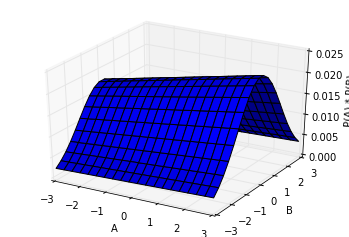

In [15]:
PA = normale(19,1)[1]
PB = proba_affine(19, 0.001)[1]

dessine(P_XY(PA, PB))

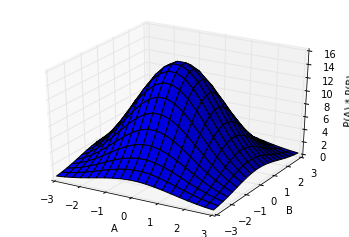

In [36]:
PA = normale(19,1)[1]
PB = normale(19, 0.01)[1]

dessine(P_XY(PA, PB))

## <font color='red'> Indépendances conditionnelles <font>

### 1. Indépendance de X et T conditionnellement à (Y,Z)

In [17]:
# creation de P(X,Y,Z,T)
P_XYZT = np.array([[[[ 0.0192,  0.1728],
                     [ 0.0384,  0.0096]],

                    [[ 0.0768,  0.0512],
                     [ 0.016 ,  0.016 ]]],

                   [[[ 0.0144,  0.1296],
                     [ 0.0288,  0.0072]],

                    [[ 0.2016,  0.1344],
                     [ 0.042 ,  0.042 ]]]])
P_XYZT

array([[[[0.0192, 0.1728],
         [0.0384, 0.0096]],

        [[0.0768, 0.0512],
         [0.016 , 0.016 ]]],


       [[[0.0144, 0.1296],
         [0.0288, 0.0072]],

        [[0.2016, 0.1344],
         [0.042 , 0.042 ]]]])

In [18]:
P_XYZT[1][1][0][0]

0.2016

In [19]:
P_YZ = []
for y in range(2):
    l = []
    for z in range(2):
        l.append(sum([P_XYZT[x][y][z][t] for x in range(2) for t in range(2)]))
    P_YZ.append(l)
P_YZ = np.array(P_YZ)
P_YZ

array([[0.336, 0.084],
       [0.464, 0.116]])

In [20]:
P_XTcondYZ = []
for x in range(2):
    l = []
    for y in range(2):
        ll = []
        for z in range(2):
            lll = []
            for t in range(2):
                lll.append(P_XYZT[x][y][z][t]/P_YZ[y][z])
            ll.append(lll)
        l.append(ll)
    P_XTcondYZ.append(l)
P_XTcondYZ = np.array(P_XTcondYZ)
P_XTcondYZ

array([[[[0.05714286, 0.51428571],
         [0.45714286, 0.11428571]],

        [[0.16551724, 0.11034483],
         [0.13793103, 0.13793103]]],


       [[[0.04285714, 0.38571429],
         [0.34285714, 0.08571429]],

        [[0.43448276, 0.28965517],
         [0.36206897, 0.36206897]]]])

In [21]:
sum([P_XTcondYZ[x][0][1][0] for x in range(2)])

0.8

In [22]:
P_XcondYZ = []
for x in range(2):
    l = []
    for y in range(2):
        ll = []
        for z in range(2):
            ll.append(sum([P_XTcondYZ[x][y][z][t] for t in range(2)]))
        l.append(ll)
    P_XcondYZ.append(l)
P_XcondYZ = np.array(P_XcondYZ)
P_XcondYZ

array([[[0.57142857, 0.57142857],
        [0.27586207, 0.27586207]],

       [[0.42857143, 0.42857143],
        [0.72413793, 0.72413793]]])

In [23]:
P_TcondYZ = []
for t in range(2):
    l = []
    for y in range(2):
        ll = []
        for z in range(2):
            ll.append(sum([P_XTcondYZ[x][y][z][t] for x in range(2)]))
        l.append(ll)
    P_TcondYZ.append(l)
P_TcondYZ = np.array(P_TcondYZ)
P_TcondYZ

array([[[0.1, 0.8],
        [0.6, 0.5]],

       [[0.9, 0.2],
        [0.4, 0.5]]])

In [24]:
P_TcondYZ[1][0][0]

0.9000000000000001

In [25]:
def indepXTcondYZ():
    for x in range(2):
        for y in range(2):
            for z in range(2):
                for t in range(2):
                    if P_XTcondYZ[x][y][z][t] != P_XcondYZ[x][y][z]*P_TcondYZ[t][y][z]:
                        print("X et T ne sont pas independantes conditionnelement a (Y,Z)")
                        return
    print("X et T sont independantes conditionnelement a (Y,Z)")
    return
indepXTcondYZ()

X et T ne sont pas independantes conditionnelement a (Y,Z)


### 2. Indépendance de X et (Y,Z)

In [26]:
P_XYZ = []
for x in range(2):
    l = []
    for y in range(2):
        ll = []
        for z in range(2):
            ll.append(sum([P_XYZT[x][y][z][t] for t in range(2)]))
        l.append(ll)
    P_XYZ.append(l)
P_XYZ = np.array(P_XYZ)
P_XYZ

array([[[0.192, 0.048],
        [0.128, 0.032]],

       [[0.144, 0.036],
        [0.336, 0.084]]])

In [27]:
P_X = []
for x in range(2):
    P_X.append(sum([P_XYZ[x][y][z] for y in range(2) for z in range(2)]))
P_X = np.array(P_X)
P_X

array([0.4, 0.6])

In [28]:
P_YZ = []
for y in range(2):
    l = []
    for z in range(2):
        l.append(sum([P_XYZ[x][y][z] for x in range(2)]))
    P_YZ.append(l)
P_YZ = np.array(P_YZ)
P_YZ

array([[0.336, 0.084],
       [0.464, 0.116]])

In [29]:
def indepX_YZ():
    for x in range(2):
        for y in range(2):
            for z in range(2):
                if P_XYZ[x][y][z] != P_X[x]*P_YZ[y][z] :
                    print("X et (Y,Z) ne sont pas independants")
                    return
    print("X et (Y,Z) sont independants")
    return
indepX_YZ()

X et (Y,Z) ne sont pas independants


## <font color='red'> Indépendances conditionnelles et consommation mémoire <font>

### 1. Package de manipulation de probabilités 

In [30]:
# creation de deux variables booléennes A et B :
A = gum.LabelizedVariable( 'A', 'A', 2 )
B = gum.LabelizedVariable( 'B', 'B', 2 )

# creation d'une distribution de probabilité P(A,B) :
proba = gum.Potential ()
proba.add ( A )
proba.add ( B )

# affichage de la probabilité
proba

(gum::Potential<double>@0x350a190) <A:0|B:0> :: 0 /<A:1|B:0> :: 0 /<A:0|B:1> :: 0 /<A:1|B:1> :: 0

### 2. Téléchargement d'une distribution jointe 

In [31]:
def read_file(filename):
    """
    Renvoie les variables aléatoires et la probabilité contenues dans le
    fichier dont le nom est passé en argument.
    """
    Pjointe = gum.Potential ()
    variables = []

    fic = open ( filename, 'r' )
    # on rajoute les variables dans le potentiel
    nb_vars = int ( fic.readline () )
    for i in range ( nb_vars ):
        name, domsize = fic.readline ().split ()
        variable = gum.LabelizedVariable(name,name,int (domsize))
        variables.append ( variable )
        Pjointe.add(variable)

    # on rajoute les valeurs de proba dans le potentiel
    cpt = []
    for line in fic:
        cpt.append ( float(line) )
    Pjointe.fillWith(np.array ( cpt ) )

    fic.close ()
    return np.array ( variables ), Pjointe

In [32]:
read_file('asia.txt')

(array([(gum::LabelizedVariable@0x3364000) visit_to_Asia?<0,1>,
        (gum::LabelizedVariable@0x3557820) tuberculosis?<0,1>,
        (gum::LabelizedVariable@0x35991d0) smoking?<0,1>,
        (gum::LabelizedVariable@0x36ba040) lung_cancer?<0,1>,
        (gum::LabelizedVariable@0x35a9f70) tuberculosis_or_lung_cancer?<0,1>,
        (gum::LabelizedVariable@0x343cf90) bronchitis?<0,1>,
        (gum::LabelizedVariable@0x321ce50) positive_Xray?<0,1>,
        (gum::LabelizedVariable@0x3466180) dyspnoea?<0,1>], dtype=object),
 (gum::Potential<double>@0x36cd790) <visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0|positive_Xray?:0|dyspnoea?:0> :: 1.30977e-05 /<visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0|positive_Xray?:0|dyspnoea?:0> :: 0.000259334 /<visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0|positive_Xray?:0|dyspnoea?:0> ::

### 3. Test d'indépendance conditionnelle 

In [33]:
def conditional_indep(P, X, Y, Z, eps):
    P_XYZ = P.margSumIn(['X','Y','Z'])
    P_XZ = P_XYZ.margSumIn(['Y'])
    P_YZ = P_XYZ.margSumIn(['X'])
    P_Z = P_XZ.margSumIn(['Z'])
    P_Y = P_YZ.margSumIn(['Z'])
    P_XcondZ = P_XZ / P_Z
    P_YcondZ = P_YZ / P_Z
    P_XYcondZ = P_XYZ / P_Z
    Q = P_XYcondZ - P_XcondZ * P_YcondZ
    return True if Q.abs().max < eps else False

### 4. Compactage de probabilités conditionnelles 

In [34]:
def compact_conditional_proba(P, X_in, eps):
    K = S
    for X_ij in K:
        if conditional_indep(P, X_in, X_ij, K - X_ij):
            K -= X_ij
    return

In [35]:
gnb.showPotential(proba)

   |---------------|
---|       A       |
 B |   0      1    |
---|---------------|
 0 | 0.0000 0.0000 |
 1 | 0.0000 0.0000 |
---|---------------|
